# Volcano Activity Analysis and Visualization in Indonesia

This notebook analyzes volcanic activity in Indonesia, using visualizations and predictive modeling to gain insights into volcanic characteristics, intensity, and spatial distribution.

In [2]:
!pip install prophet


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import prophet
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [4]:

# Load volcano data
volcano_data = pd.read_csv('/kaggle/input/volcano-dataset/database.csv')
volcano_data.head()


,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [5]:

# Check for missing values and basic data types
volcano_data.info()
volcano_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               1508 non-null   int64  
 1   Name                 1508 non-null   object 
 2   Country              1508 non-null   object 
 3   Region               1508 non-null   object 
 4   Type                 1508 non-null   object 
 5   Activity Evidence    1507 non-null   object 
 6   Last Known Eruption  1508 non-null   object 
 7   Latitude             1508 non-null   float64
 8   Longitude            1508 non-null   float64
 9   Elevation (Meters)   1508 non-null   int64  
 10  Dominant Rock Type   1455 non-null   object 
 11  Tectonic Setting     1501 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
count,1508.000000,1508,1508,1508,1508,1507,1508,1508.000000,1508.000000,1508.000000,1455,1501
unique,NaN,1478,100,19,33,6,399,NaN,NaN,NaN,11,11
top,NaN,Unnamed,United States,South America,Stratovolcano,Eruption Observed,Unknown,NaN,NaN,NaN,Andesite / Basaltic Andesite,Subduction Zone / Continental Crust (>25 km)
freq,NaN,23,173,197,597,568,637,NaN,NaN,NaN,578,762
mean,296656.110743,NaN,NaN,NaN,NaN,NaN,NaN,14.083156,23.391469,1683.357427,NaN,NaN
std,48861.852600,NaN,NaN,NaN,NaN,NaN,NaN,31.871107,113.656588,1571.102885,NaN,NaN
min,210010.000000,NaN,NaN,NaN,NaN,NaN,NaN,-78.500000,-179.970000,-4200.000000,NaN,NaN
25%,261157.500000,NaN,NaN,NaN,NaN,NaN,NaN,-7.068750,-78.274250,687.250000,NaN,NaN
50%,300015.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.861500,38.390000,1464.000000,NaN,NaN
75%,342123.250000,NaN,NaN,NaN,NaN,NaN,NaN,41.748750,138.578000,2352.250000,NaN,NaN


In [6]:

# Fill missing values for analysis
volcano_data['Activity Evidence'] = volcano_data['Activity Evidence'].fillna('Unknown')
volcano_data['Dominant Rock Type'] = volcano_data['Dominant Rock Type'].fillna('Unknown')


In [7]:
# Filter for volcanoes in Indonesia
indonesia_volcano_data = volcano_data[volcano_data['Country'] == 'Indonesia']

# Plot volcano locations in Indonesia
fig = px.scatter_mapbox(indonesia_volcano_data, lat='Latitude', lon='Longitude', 
                        hover_name='Name', hover_data=['Country', 'Region', 'Type'],
                        color='Type', zoom=4, height=600, title="Volcano Locations in Indonesia")
fig.update_layout(mapbox_style="carto-positron")
fig.show()


In [8]:
import pandas as pd

# Assuming `indonesia_volcano_data` has already been processed as shown above
# Define the path and filename for the CSV output
output_path = '/kaggle/working/processed_indonesia_volcano_data.csv'

# Save the processed data to a CSV file
indonesia_volcano_data.to_csv(output_path, index=False)

print(f"CSV file saved as {output_path}")


CSV file saved as /kaggle/working/processed_indonesia_volcano_data.csv


In [9]:
import plotly.express as px

# Filter volcano data for Indonesia
indonesia_volcano_data = volcano_data[volcano_data['Country'] == 'Indonesia']

# Ensure Latitude and Longitude columns are numeric
indonesia_volcano_data['Latitude'] = pd.to_numeric(indonesia_volcano_data['Latitude'], errors='coerce')
indonesia_volcano_data['Longitude'] = pd.to_numeric(indonesia_volcano_data['Longitude'], errors='coerce')

# Remove rows with missing coordinates or elevation
indonesia_volcano_data = indonesia_volcano_data.dropna(subset=['Latitude', 'Longitude', 'Elevation (Meters)'])


# Assuming `indonesia_volcano_data` has already been processed as shown above
# Define the path and filename for the CSV output
output_path = '/kaggle/working/processed2_indonesia_volcano_data.csv'

# Save the processed data to a CSV file
indonesia_volcano_data.to_csv(output_path, index=False)

print(f"CSV file saved as {output_path}")


# Get the elevation range for the volcanoes
elevation_range = (indonesia_volcano_data['Elevation (Meters)'].min(), indonesia_volcano_data['Elevation (Meters)'].max())

# Create a density heatmap of volcanoes on the map of Indonesia
fig = px.density_mapbox(indonesia_volcano_data, lat='Latitude', lon='Longitude', 
                        hover_name='Name', hover_data=['Country', 'Region', 'Type', 'Elevation (Meters)'],
                        color_continuous_scale='Reds', 
                        title=f"Density Heatmap of Volcanoes in Indonesia (Elevation Range: {elevation_range[0]}m to {elevation_range[1]}m)", 
                        zoom=4, height=600)

# Update the map style (using a Mapbox style that doesn't require an access token)
fig.update_layout(mapbox_style="open-street-map")

# Show the plot
fig.show()


CSV file saved as /kaggle/working/processed2_indonesia_volcano_data.csv


/tmp/ipykernel_29/91808432.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_29/91808432.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1]:
import pandas as pd

# Assuming `indonesia_volcano_data` has already been processed as shown above
# Define the path and filename for the CSV output
output_path = '/kaggle/working/processed_indonesia_volcano_data.csv'

# Save the processed data to a CSV file
indonesia_volcano_data.to_csv(output_path, index=False)

print(f"CSV file saved as {output_path}")

NameError: name 'indonesia_volcano_data' is not defined

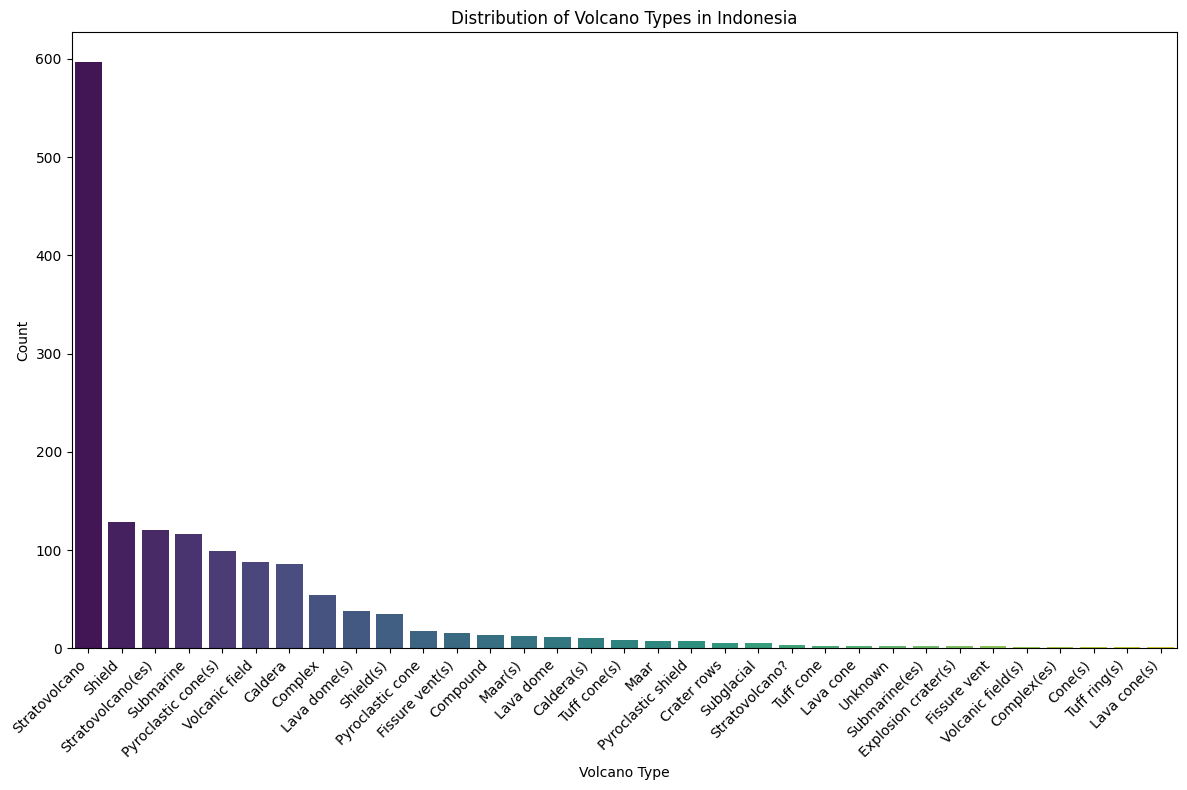

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



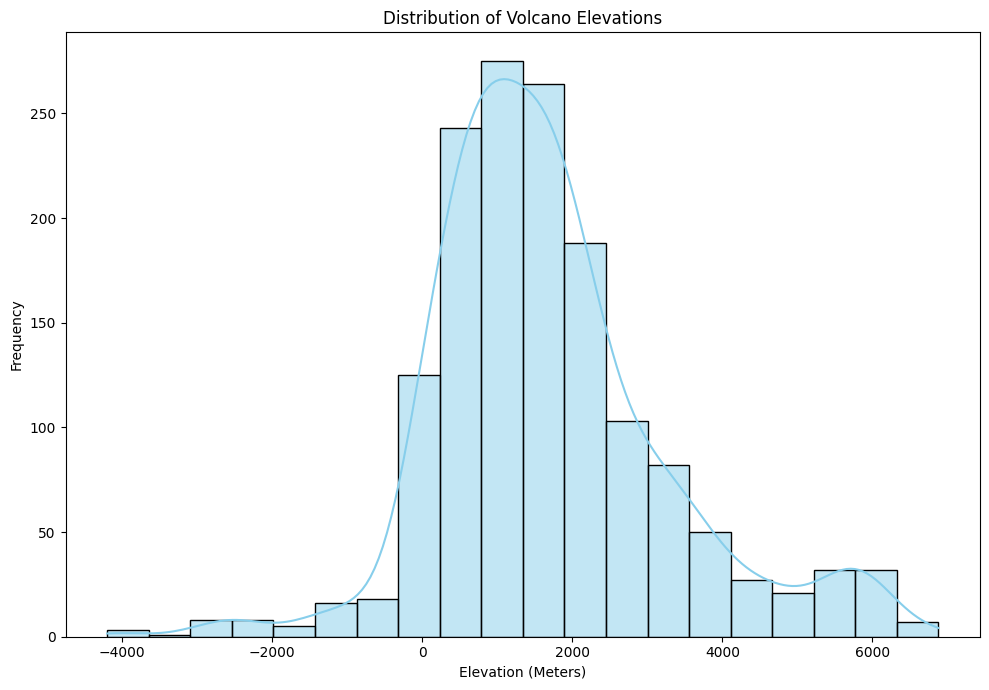

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot volcano types with adjusted figure size and rotation
plt.figure(figsize=(12, 8))  # Increase figure size for clarity
sns.countplot(data=volcano_data, x='Type', order=volcano_data['Type'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.title("Distribution of Volcano Types in Indonesia")
plt.xlabel("Volcano Type")
plt.ylabel("Count")
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

# Plot elevation distribution
plt.figure(figsize=(10, 7))
sns.histplot(volcano_data['Elevation (Meters)'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Volcano Elevations")
plt.xlabel("Elevation (Meters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
